https://github.com/modflowpy/flopy/blob/develop/examples/Tutorials/Tutorial02/tutorial02.py
And example problems that are described in the 1999 MT3DMS report...also see flopy3_MT3DMS_examples.py.

In [9]:
# Imports
import os
import numpy as np
import matplotlib.pyplot as plt
import flopy
import flopy.utils.binaryfile as bf
%matplotlib inline

In [10]:
#Set working directory and names
ws = 'D:/Chelsea/Projects/DelawareStream/FloPy/Tutorial02wMT3DMS2'
wspath = 'D:/Chelsea/Projects/DelawareStream/FloPy/Tutorial02wMT3DMS2/'
if not os.path.exists(ws): #make sure workspace directory exists
    os.makedirs(ws)
name = 'Tutorial02wMT3DMS2'
modelname = 'Tutorial02wMT3DMS2'
exe_name_mf = os.path.abspath('D:/Chelsea/Projects/DelawareStream/Script/Executables/mf2005')
exe_name_mt = os.path.abspath('D:/Chelsea/Projects/DelawareStream/Script/Executables/mt3dms')

In [11]:
# Model domain and grid definition
nlay = 4 #number of layers
nrow = 61 #number of rows
ncol = 40 #number of columns
delr = [2000, 1600, 800, 400, 200, 100] + 28*[50] + [100, 200, 400, 800, 1600, 2000] #cell width along rows
delc = [2000, 2000, 2000, 1600, 800, 400, 200, 100] + 45 * [50] + [100, 200, 400, 800, 1600, 2000, 2000, 2000] #the cell width along columns
delv = 25.#elevation change from top to bottom of model
top = 780.
botm = [top - delv * k for k in range(1, nlay + 1)] # bottom elevation of each layer including top elevation
prsity = 0.3
al = 10.
trpt = 0.2
trpv = 0.2
perlen=1000 #length of stress period
perlen_mf = perlen
perlen_mt = perlen
hk = [60., 60., 520., 520.] #hydraulic conductivity along rows
vka = .1 #vertical hydraulic conductivity
laytyp = 0 #layer type, 0 - confined, >0 - convertible, <0 - convertialbe unless THICKSTRT

#Lx = 1000. #total width across rows of entire model
#Ly = 1000. #total width across columns
#ztop = 10. 
#zbot = -50. #bottom elevation
#sy = 0.1 #specific yield
#ss = 1.e-4 #specific storage

In [12]:
# Variables for the BAS package, which is used to specify (1) the location of active, inactive, and specified head cells, 
# (2) the head stored in inactive cells, and (3) the initial heads in all cells.

# Note that changes from the previous tutorial!
ibound = np.ones((nlay, nrow, ncol), dtype=np.int32) #boundary variable... one value for every cell... if >0 cell is active, if =0 cell is inactive, if <0 cell has constant head. 
ibound[:, :, 0] = -1
ibound[:, :, -1] = -1

strt = np.ones((nlay, nrow, ncol), dtype=np.float32) #initial starting head... one value for every cell

In [13]:
# FloPy objects
mf = flopy.modflow.Modflow(modelname=name, model_ws=ws, exe_name=exe_name_mf)
# Creates Discretization File, which gives (1) the number of rows, columns and layers, (2) the cell sizes, 
# (3) the presence of Quasi-3D confining beds, and (4) the time discretization.
dis = flopy.modflow.ModflowDis(mf, nlay, nrow, ncol, delr=delr, delc=delc, 
                               top=top, botm=botm, perlen=perlen_mf)
bas = flopy.modflow.ModflowBas(mf, ibound=ibound, strt=strt)
# The Layer-Property Flow package is used to specify properties controlling flow between cells.
# Ipakcb - A flag that is used to determine if cell-by-cell budget data should be saved. If ipakcb is non-zero cell-by-cell 
# budget data will be saved. (default is 53)
lpf = flopy.modflow.ModflowLpf(mf, hk=hk, vka=vka, layvka=1, laytyp=laytyp, 
                               ipakcb=53) 
# The Preconditioned Conjugate-Gradient package is used to solve the finite difference 
# equations in each step of a MODFLOW stress period.
pcg = flopy.modflow.ModflowPcg(mf) 

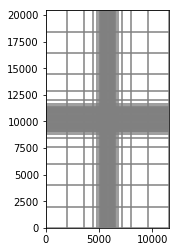

In [14]:
mm = flopy.plot.PlotMapView(model=mf)
plota = mm.plot_grid()

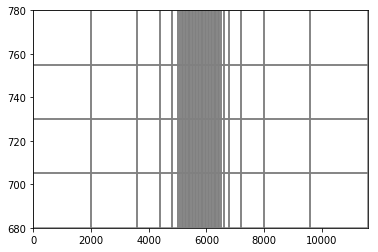

In [15]:
mm2 = flopy.plot.PlotCrossSection(model=mf, line={'row': 2})
plotb = mm2.plot_grid()

In [16]:
# Make list for stress period 1
#stageleft = 10.
#stageright = 10.
#bound_sp1 = []
#for il in range(nlay):
##    condright = hk * (stageright - zbot) * delc
#    for ir in range(nrow):
 #       bound_sp1.append([il, ir, 0, stageleft, condleft]) #layer, row, column, head on boundary, and conductance
#        bound_sp1.append([il, ir, ncol - 1, stageright, condright])
#print('Adding ', len(bound_sp1), 'GHBs for stress period 1.') #which is the left and right boundary conditions

In [17]:
# Make list for stress period 2
# In the stress period 2, the head drops to 0 and becomes less conductive at the right boundary.
#stageleft = 10.
#stageright = 0.
#condleft = hk * (stageleft - zbot) * delc #hydraulic conductivity * area of left face 
#condright = hk * (stageright - zbot) * delc
#bound_sp2 = []
#for il in range(nlay):
#    for ir in range(nrow):
#        bound_sp2.append([il, ir, 0, stageleft, condleft])
#        bound_sp2.append([il, ir, ncol - 1, stageright, condright])
#print('Adding ', len(bound_sp2), 'GHBs for stress period 2.') 

In [18]:
# Create the well package
# Remember to use zero-based layer, row, column indices!
# The Well package is used to simulate a specified flux to individual cells and specified in units of length3/time.
welspd = [[3 - 1, 11 - 1, 29 - 1, -19230.00],
          [3 - 1, 19 - 1, 26 - 1, -19230.00],
          [3 - 1, 26 - 1, 23 - 1, -19230.00],
          [3 - 1, 33 - 1, 20 - 1, -19230.00],
          [3 - 1, 40 - 1, 17 - 1, -19230.00],
          [3 - 1, 48 - 1, 14 - 1, -19230.00],
          [3 - 1, 48 - 1,  9 - 1, -15384.00],
          [3 - 1, 52 - 1, 17 - 1, -17307.00]]
wel = flopy.modflow.ModflowWel(mf, stress_period_data=welspd)

In [19]:
rch = flopy.modflow.ModflowRch(mf, rech=1.14e-3)

In [20]:
# The Link-MT3DMS package is used to record flow information for use by MT3DMS
lmt = flopy.modflow.ModflowLmt(mf)

In [21]:
# Write the model input files
mf.write_input()

In [22]:
# Run the model
success, mfoutput = mf.run_model(silent=False, pause=False)
if not success:
    raise Exception('MODFLOW did not terminate normally.')

FloPy is using the following  executable to run the model: D:\Chelsea\Projects\DelawareStream\Script\Executables\mf2005.exe

                                  MODFLOW-2005     
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUND-WATER FLOW MODEL
                             Version 1.12.00 2/3/2017                        

 Using NAME file: Tutorial02wMT3DMS2.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2019/07/16 16:12:16

 Solving:  Stress period:     1    Time step:     1    Ground-Water Flow Eqn.
 Run end date and time (yyyy/mm/dd hh:mm:ss): 2019/07/16 16:12:17
 Elapsed run time:  0.096 Seconds

  Normal termination of simulation


In [468]:
# Add MT3DMS components
mt = flopy.mt3d.Mt3dms(modelname=name, model_ws=ws, exe_name=exe_name_mt, modflowmodel=mf)

# Inputs for boundary conditions
v = 1. / 3. #groundwater seepage velocity, L/T
prsity = 0.3 #porosity
q = v * prsity #flux
al = 10. #longitudinal dispersivity, L
trpt = .3 #ratio of transverse to longitudinal dispersivity
q0 = 1. #volumetric injection rate, L3/T
c0 = 1000. #concentration of injected water, ppm
sconc = 0 #starting concentration

In [469]:
# Basic Transport Package
# The icbund array specifies the boundary condition type for solute species (shared by all species). 
# If icbund = 0, the cell is an inactive concentration cell; If icbund < 0, constant-concentration cell; If icbund > 0, 
# the cell is an active concentration cell where the concentration value will be calculated.
obs = [[1 - 1, 5 - 1, 5 - 1],[1 - 1, 8 - 1, 8 - 1]] #create observation points
btn = flopy.mt3d.Mt3dBtn(mt, icbund=1, prsity=prsity, sconc=sconc, obs=obs)

In [470]:
# Advection
mixelm = 1 # integer flag for the advection solution option
dceps = 1.e-5 #small relative cell concentration gradient below which advection transport is considered
nplane = 1 #flag indicating whether random or fixed pattern is selected for initial placement (0 = random, 1 = 2D, 2 = 3D)
npl = 0 #num of initial particles per cell to placed at cells where <= decps
nph = 16 #num of initial particles per cell to placed at cells where >= decps
npmin = 2 #min num of particles allowed per cell
npmax = 32 #max num of particles allowed per cell
dchmoc=1.e-3 #critical Relative Concentration Gradient for controlling use of either MOC or MMOC in the HMOC solution scheme.
nlsink = nplane #flag indicating whether the random or fixed pattern is selected for initial placement of particles to approximate sink cells
npsink = nph #number of particles used to approximate sink cells in the MMOC scheme. 

adv = flopy.mt3d.Mt3dAdv(mt, mixelm=mixelm, dceps=dceps, nplane=nplane, 
                             npl=npl, nph=nph, npmin=npmin, npmax=npmax,
                             nlsink=nlsink, npsink=npsink, percel=0.5)

# Dispersion
dsp = flopy.mt3d.Mt3dDsp(mt, al=al, trpt=trpt)

# Source and Sink Mixing Package
spd = {0:[0, 4, 4, sconc, 2], 1:[0, 4, 4, c0, 2], 2:[0, 4, 4, c0, 2]} #stress period, where last value is the type of cell
ssm = flopy.mt3d.Mt3dSsm(mt, stress_period_data=spd)

# Generalized Conjugate Gradient Package Class
gcg = flopy.mt3d.Mt3dGcg(mt)

In [471]:
mt.write_input()

fname = os.path.join(wspath+'MT3D001.UCN')
#if os.path.isfile(fname):
#    os.remove(fname)
mt.run_model(silent=True, pause=False, report=True, normal_msg = 'normal termination')

(False,
 [' MT3DMS - Modular 3-D Multi-Species Transport Model [Version 5.30]',
  ' Developed at University of Alabama for U.S. Department of Defense',
  '',
  ' Using NAME File: Tutorial02wMT3DMS.nam                             ',
  '',
  ' STRESS PERIOD NO.    1',
  '',
  ' TIME STEP NO.    1',
  ' FROM TIME =   0.0000     TO    1.0000    ',
  '',
  ' Transport Step:    1   Step Size:   1.000     Total Elapsed Time:   1.0000    ',
  ' Outer Iter.  1  Inner Iter.  1:  Max. DC =   0.000      [K,I,J]    1    1    1',
  '',
  ' STRESS PERIOD NO.    2',
  '',
  ' TIME STEP NO.    1',
  ' FROM TIME =   1.0000     TO    2.0000    ',
  '',
  ' Transport Step:    1   Step Size:   1.000     Total Elapsed Time:   2.0000    ',
  ' Outer Iter.  1  Inner Iter.  1:  Max. DC =  0.5552      [K,I,J]    1    5    5',
  ' Outer Iter.  1  Inner Iter.  2:  Max. DC =  0.1155E-10  [K,I,J]    1    4    6',
  '',
  ' TIME STEP NO.    2',
  ' FROM TIME =   2.0000     TO    3.0000    ',
  '',
  ' Transport Step

In [447]:
fname = os.path.join(ws, 'MT3D001.UCN')
ucnobj = flopy.utils.UcnFile(fname)
times = ucnobj.get_times()
conc = ucnobj.get_alldata()

fname = os.path.join(ws, 'MT3D001.OBS')
if os.path.isfile(fname):
    cvt = mt.load_obs(fname)
else:
    cvt = None

fname = os.path.join(ws, 'MT3D001.MAS')
mvt = mt.load_mas(fname)
cvt

rec.array([(1,   1.,   0.     ), (1,   2.,   0.55522),
           (1,   3.,   1.1101 ), (1,   4.,   1.6646 ),
           (1,   5.,   2.2189 ), (1,   6.,   2.7727 ),
           (1,   7.,   3.3262 ), (1,   8.,   3.8794 ),
           (1,   9.,   4.4323 ), (1,  10.,   4.9848 ),
           (1,  11.,   5.537  ), (1,  12.,   6.0888 ),
           (1,  13.,   6.6403 ), (1,  14.,   7.1914 ),
           (1,  15.,   7.7423 ), (1,  16.,   8.2928 ),
           (1,  17.,   8.8429 ), (1,  18.,   9.3927 ),
           (1,  19.,   9.9422 ), (1,  20.,  10.491  ),
           (1,  21.,  11.04   ), (1,  22.,  11.589  ),
           (1,  23.,  12.137  ), (1,  24.,  12.685  ),
           (1,  25.,  13.232  ), (1,  26.,  13.779  ),
           (1,  27.,  14.326  ), (1,  28.,  14.872  ),
           (1,  29.,  15.419  ), (1,  30.,  15.964  ),
           (1,  31.,  16.51   ), (1,  32.,  17.055  ),
           (1,  33.,  17.6    ), (1,  34.,  18.144  ),
           (1,  35.,  18.688  ), (1,  36.,  19.232  ),
          

In [448]:
cvt['(1, 5, 5)']

array([  0.     ,   0.55522,   1.1101 ,   1.6646 ,   2.2189 ,   2.7727 ,
         3.3262 ,   3.8794 ,   4.4323 ,   4.9848 ,   5.537  ,   6.0888 ,
         6.6403 ,   7.1914 ,   7.7423 ,   8.2928 ,   8.8429 ,   9.3927 ,
         9.9422 ,  10.491  ,  11.04   ,  11.589  ,  12.137  ,  12.685  ,
        13.232  ,  13.779  ,  14.326  ,  14.872  ,  15.419  ,  15.964  ,
        16.51   ,  17.055  ,  17.6    ,  18.144  ,  18.688  ,  19.232  ,
        19.776  ,  20.319  ,  20.862  ,  21.404  ,  21.946  ,  22.488  ,
        23.03   ,  23.571  ,  24.112  ,  24.652  ,  25.192  ,  25.732  ,
        26.272  ,  26.811  ,  27.35   ,  27.888  ,  28.427  ,  28.965  ,
        29.502  ,  30.039  ,  30.576  ,  31.113  ,  31.649  ,  32.185  ,
        32.721  ,  33.256  ,  33.791  ,  34.326  ,  34.86   ,  35.394  ,
        35.928  ,  36.461  ,  36.995  ,  37.528  ,  38.061  ,  38.593  ,
        39.126  ,  39.658  ,  40.19   ,  40.722  ,  41.254  ,  41.785  ,
        42.316  ,  42.847  ,  43.378  ,  43.909  , 

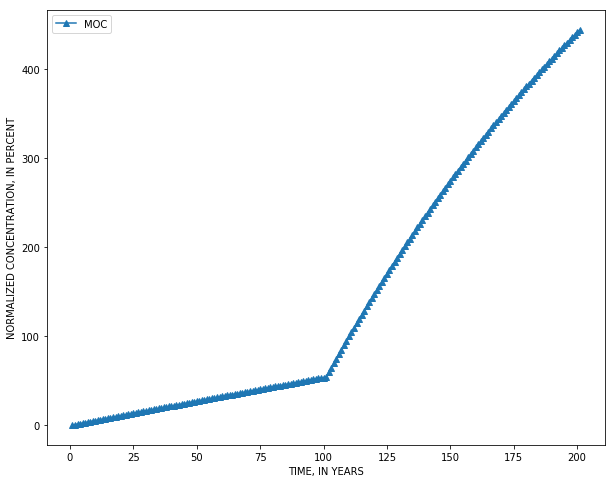

In [449]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1)
#mf, mt, conc, cvt, mvt   = p06('p06', 1, 56.25)
x = cvt['time']
y = cvt['(1, 5, 5)']
ax.plot(x, y, label='MOC', marker='^')

#mf, mt, conc, cvt, mvt = p06('p06', -1, 56.25)
#x = cvt['time'] / 365.
#y = cvt['(1, 16, 16)']
#ax.plot(x, y, label='ULTIMATE', marker='s')

#mf, mt, conc, cvt, mvt = p06('p06', 0, 56.25)
#x = cvt['time'] / 365.
#y = cvt['(1, 16, 16)']
#ax.plot(x, y, label='Upstream FD', marker='x')

#plt.xlim(0, 10)
#plt.ylim(0, 100.0)
plt.xlabel('TIME, IN YEARS')
plt.ylabel('NORMALIZED CONCENTRATION, IN PERCENT')
plt.legend()

In [422]:
# Create the headfile and budget file objects
headobj = bf.HeadFile(wspath+modelname+'.hds')
times = headobj.get_times()
cbb = bf.CellBudgetFile(wspath+modelname+'.cbc')

In [423]:
# Setup contour parameters
levels = np.linspace(0, 10, 11)
extent = (delr/2., Lx - delr/2., delc/2., Ly - delc/2.)
print('Levels: ', levels)
print('Extent: ', extent)

Levels:  [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
Extent:  (50.0, 950.0, 50.0, 950.0)


In [424]:
# Well point
wpt = ((float(ncol/2)-0.5)*delr, (float(nrow/2-1)+0.5)*delc)
print(wpt)
wpt = (450., 550.)
print(wpt)

(450.0, 450.0)
(450.0, 550.0)


*****Processing time:  1.0
Head statistics
  min:  10.0
  max:  10.0
  std:  0.0
*****Processing time:  101.0
Head statistics
  min:  0.026710931
  max:  12.320779
  std:  3.4164095


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


*****Processing time:  201.0
Head statistics
  min:  0.020798711
  max:  15.473768
  std:  3.6415482
*****Processing time:  301.0


Exception: totim value (301.0) not found in file...

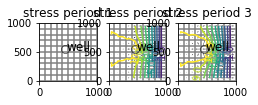

In [425]:
# Make the plots
#mytimes = [1.0, 101.0, 201.0]
mytimes = [1.0, 101.0, 201.0, 301.0, 401.0]
for iplot, time in enumerate(mytimes):
    print('*****Processing time: ', time)
    head = headobj.get_data(totim=time)
    #Print statistics
    print('Head statistics')
    print('  min: ', head.min())
    print('  max: ', head.max())
    print('  std: ', head.std())

    # Extract flow right face and flow front face
    frf = cbb.get_data(text='FLOW RIGHT FACE', totim=time)[0]
    fff = cbb.get_data(text='FLOW FRONT FACE', totim=time)[0]

    #Create the plot
    plt.subplot(1, len(mytimes), iplot + 1, aspect='equal')
    #plt.subplot(1, 1, 1, aspect='equal')
    plt.title('stress period ' + str(iplot + 1))


    modelmap = flopy.plot.PlotMapView(model=mf, layer=0)
    qm = modelmap.plot_ibound()
    lc = modelmap.plot_grid()
    #qm = modelmap.plot_bc('GHB')#, alpha=0.5)
    cs = modelmap.contour_array(head, levels=levels)
    plt.clabel(cs, inline=1, fontsize=10, fmt='%1.1f')#, zorder=11
    quiver = modelmap.plot_discharge(frf, fff, head=head)
    
    mfc = 'None'
    if (iplot+1) == len(mytimes):
        mfc='black'
    plt.plot(wpt[0], wpt[1], lw=0, marker='o', markersize=8, 
             markeredgewidth=0.5,
             markeredgecolor='black', markerfacecolor=mfc, zorder=9)
    plt.text(wpt[0]+25, wpt[1]-25, 'well', size=12, zorder=12)
    plt.savefig(wspath+'tutorial2-{}.png'.format(iplot))

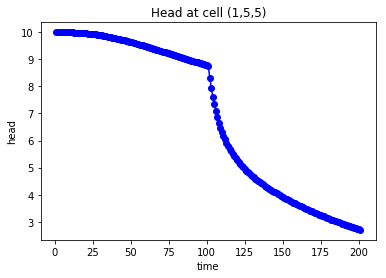

In [163]:
# Plot the head versus time
# This is the well spot, notice how pumping started ony in the last stress period
idx = (0, int(nrow/2) - 1, int(ncol/2) - 1)
ts = headobj.get_ts(idx)
plt.subplot(1, 1, 1)
ttl = 'Head at cell ({0},{1},{2})'.format(idx[0] + 1, idx[1] + 1, idx[2] + 1)
plt.title(ttl)
plt.xlabel('time')
plt.ylabel('head')
plt.plot(ts[:, 0], ts[:, 1], 'bo-')
plt.savefig(wspath+'tutorial2-ts.png')